In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Для анализа загрузим базу данных о посетителях магазина

In [18]:
df = pd.read_csv('Mall_Customers.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Из общей информации видим:
*   Нет пустых ячеек
*   Всего 200 строк и 5 столбцов
*   Можем отследить id покупателя(CustomerID), пол(Genre), возраст(Age), годовой доход, тыс.$(Annual Income (k$)), оценку расходов(Spending Score (1-100))
*   4 столбца имеют тип данных int64 и один object



Для примера посмотрим первые 5 строк таблицы





In [24]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Из этой таблицы видим:
*   Самый молодой покупатель - 18 лет, самый старший - 70 лет, средний возраст покупателя - 39 лет
*   Средний доход покупателя - 60,56 тысяч долларов, минимальный - 15, максимальный 137






In [26]:
df[(df['Age'] < 35) & (df['Spending Score (1-100)'] > 50)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
...,...,...,...,...,...
185,186,Male,30,99,97
187,188,Male,28,101,68
191,192,Female,32,103,69
197,198,Male,32,126,74


In [27]:
df[(df['Age'] > 50) & (df['Spending Score (1-100)'] > 50)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
53,54,Male,59,43,60
60,61,Male,70,46,56
62,63,Female,67,47,52
63,64,Female,54,47,59
64,65,Male,63,48,51
70,71,Male,70,49,55
73,74,Female,60,50,56
80,81,Male,57,54,51
86,87,Female,55,57,58
90,91,Female,68,59,55


In [30]:
df[(df['Age'] <= 50) & (df['Spending Score (1-100)'] > 50) & (df['Age'] >= 35)]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99
19,20,Female,35,23,98
27,28,Male,35,28,61
46,47,Female,50,40,55
50,51,Female,49,42,52
76,77,Female,45,54,53
81,82,Male,38,54,55
104,105,Male,49,62,56
117,118,Female,49,65,59
119,120,Female,50,67,57


Тремя командами выше разделили покупателей по возрастам, чтобы узнать какой дипоазон возраста оставляет больше денег в магазине.
Много тратят(Spending Score > 50 ) в возрасте:
1.   до 35 лет - 61 человек
2.   от 35 до 50 лет - 24 человека
3.   больше 50 лет - 12 человек

Как видим, больше покупок делают люди до 35 лет и чем старше, тем меньше людей, готовых потратить большую сумму



Дальше узнаем медианные возраст покупателя, его доход и затраты

In [32]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].median()

Age                       36.0
Annual Income (k$)        61.5
Spending Score (1-100)    50.0
dtype: float64

Проанализируем доход покупателей в зависимости от возраста.
1) Максимальный доход покупателей до 35 лет

In [40]:
df.loc[(df['Age'] < 35), ['Annual Income (k$)']].max()

Annual Income (k$)    137
dtype: int64

2) Минимальный доход покупателей до 35 лет

In [41]:
df.loc[(df['Age'] < 35), ['Annual Income (k$)']].min()

Annual Income (k$)    15
dtype: int64

3) Средний доход покупателей до 35 лет



In [42]:
df.loc[(df['Age'] < 35), ['Annual Income (k$)']].mean()

Annual Income (k$)    60.730337
dtype: float64

4) Максимальный доход покупателей от 35 до 50 лет

In [43]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 50), ['Annual Income (k$)']].max()

Annual Income (k$)    126
dtype: int64

5) Минимальный доход покупателей от 35 до 50 лет

In [45]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 50), ['Annual Income (k$)']].min()

Annual Income (k$)    18
dtype: int64

6) Средний доход покупателей от 35 до 50 лет

In [44]:
df.loc[(df['Age'] >= 35) & (df['Age'] <= 50), ['Annual Income (k$)']].mean()

Annual Income (k$)    64.126761
dtype: float64

7) Максимальный доход покупателей старше 50 лет

In [46]:
df.loc[(df['Age'] > 50), ['Annual Income (k$)']].max()

Annual Income (k$)    101
dtype: int64

8) Минимальный доход покупателей старше 50 лет

In [47]:
df.loc[(df['Age'] > 50), ['Annual Income (k$)']].min()

Annual Income (k$)    19
dtype: int64

9) Средний доход покупателей старше 50 лет

In [48]:
df.loc[(df['Age'] > 50), ['Annual Income (k$)']].mean()

Annual Income (k$)    53.85
dtype: float64

* Как видим, наибольший максимальный доход 137 тысяч долларов находится в диапазоне возрастов до 35 лет. Наименьший максимальный доход в самом старшем возрасте, больше 50 лет
*  С минимальным доходом обратная картина. Чем старше покупатель, тем выше минимальный доход. 15, 18 и 19 тысяч долларов соответствено по возрастам меньше 35, от 35 до 50, старше 50 лет
* 61, 64, 54 тысяч долларов - средний доход покупателя соответственно по диапазонам возрастов от меньшего к большему. Тут нет линейной зависимости, наибольший средний доход приходится на покупателей от 35 до 50 лет, наименьньший на покупателей старше 50 лет и наименьший на покупателей младше 35 лет

Для наглядности изобразим зависимость дохода и затрат от возраста покупателя

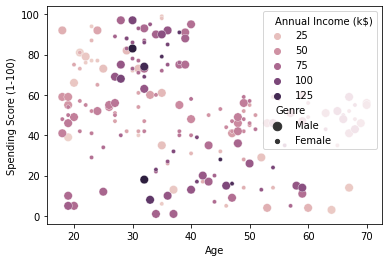

In [53]:
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)",  hue="Annual Income (k$)",  size="Genre")

* Наиболее состоятельные покупатели находятся в возрасте от 30 до 50 лет. Это видно по более насыщенному цвету.
* Больше всего покупателей возрастом до 52 лет
* Визуально сложно определить кого больше, мужчин или женщин, т.к. больших и маленьких точек примерно одинаково. Но среди самых молодых, до 20 лет, больше женщин, как и самых старших, больше 55 лет. 
* По оси игрик видим затраты на покупки в зависимости от возраста. Больше готовы оставить в магазине люди, возрастом до 40 лет